# World Happiness 2019 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
happiness = pd.read_csv('world-happiness-report-2019.csv')
countries = pd.read_csv('countries.csv')
# Strip whitespaces
countries = countries.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df = pd.merge(left=happiness,right=countries, left_on='Country (region)', right_on='Country')
df.shape

(142, 31)

Note that the report does not have values, but instead how it ranks compared to the other countries on the list. Also, the values from _social support_ to _healthy life expectancy_ are a measure of how heavily the column contributed to its happiness score, NOT how happy they are in that area. This is an important differentiation to make: A country low in the happiness ladder but ranking high in Corruption, for example, means that corruption played an important role in why the happiness is so low.

In [3]:
happiness.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,...,405.3,7.19,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,...,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,...,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,...,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,...,460.8,26.71,0.97,72.32,3.0,10.90,8.68,0.021,0.244,0.736


# Factors Correlation Heat Map
The below heatmap shows the correlation strength between different the columns. Social support, GDP per capita, and healthy life expectancy have large impacts towards perceived happiness, with quite a large gap from the other columns. Interestingly, corruption plays a little part in how the country ranked. In fact, it has little correlation with any of the factors. It's even more surprising to see that corruption has the most positive correlation with freedom.

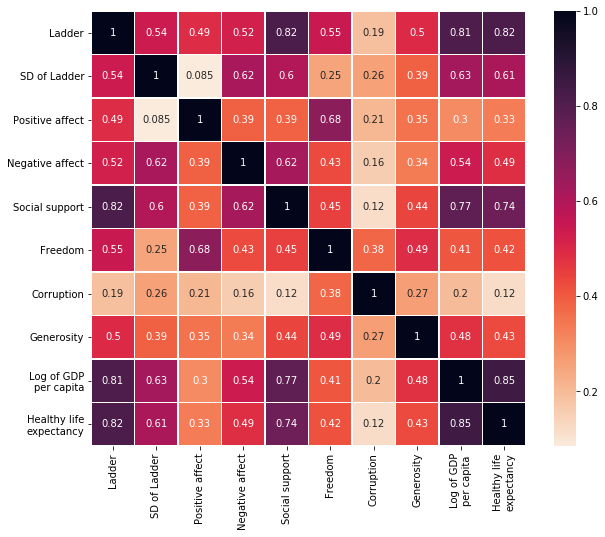

In [5]:
plt.figure(figsize = (10, 8))
sns.heatmap(happiness.corr(), annot=True, linewidths=.5, square=True, cmap="rocket_r")

In [6]:
df.groupby('Region').mean()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),90.380952,61.142857,68.238095,72.476190,88.476190,56.857143,71.350000,56.809524,80.500000,78.368421,...,160.504762,17.750000,4.012381,78.237619,1.850000,21.900000,8.086190,0.178810,0.313857,0.507286
BALTICS,50.000000,39.000000,102.333333,28.333333,21.000000,97.666667,78.333333,104.000000,38.666667,57.000000,...,292.866667,30.310000,0.610000,69.080000,3.000000,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,85.500000,49.500000,110.250000,42.083333,63.166667,93.583333,76.909091,84.250000,83.583333,85.166667,...,163.850000,19.454167,2.022500,78.523333,2.550000,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,62.272727,56.454545,100.000000,60.818182,54.636364,88.636364,128.818182,82.909091,51.363636,44.363636,...,286.690909,32.562727,2.382727,65.055455,3.000000,10.531000,10.486000,0.087636,0.309364,0.603091
LATIN AMER. & CARIB,52.000000,108.500000,34.900000,89.050000,62.200000,60.500000,84.050000,92.350000,81.300000,60.000000,...,141.640000,10.769500,3.695000,85.536000,2.075000,22.363000,6.057500,0.113200,0.304900,0.581950
NEAR EAST,71.153846,88.307692,104.916667,97.666667,83.833333,92.583333,79.857143,66.750000,43.250000,66.384615,...,221.808333,9.462308,3.194615,87.343077,1.500000,22.550000,5.032308,0.067231,0.426385,0.506154
NORTHERN AFRICA,102.000000,83.400000,120.200000,118.000000,110.400000,115.200000,70.200000,129.000000,80.400000,84.200000,...,100.200000,8.918000,3.366000,87.716000,1.666667,20.814000,4.806000,0.135000,0.426200,0.438400
NORTHERN AMERICA,14.000000,36.000000,26.500000,59.500000,28.500000,35.500000,26.500000,13.000000,14.500000,23.500000,...,725.100000,12.045000,0.120000,87.835000,3.000000,12.460000,8.030000,0.016000,0.249000,0.735500
OCEANIA,9.500000,20.500000,34.500000,24.500000,6.000000,12.500000,9.000000,7.000000,22.000000,12.000000,...,503.600000,6.075000,3.515000,90.410000,2.000000,12.950000,7.520000,0.040500,0.267500,0.692000


# Ladder Rating by Region

Western Europe holds the majority of the happiest countries with Sub-Saharan Africa with the least. The Near East countries (i.e. middle east countries such as the UAE and Qatar) have the largest distribution in terms happiness. Israel and the UAE lead the pack with ranks of 13 and 21 respectively, while countries like Syria and Yemen trail with ratings of 136 and 138.

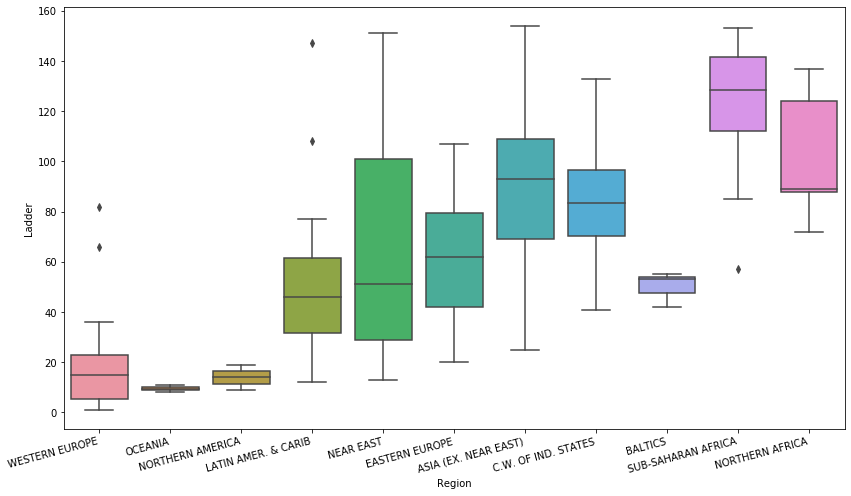

In [7]:
plt.figure(figsize = (12, 7))
ax = sns.boxplot(x="Region", y="Ladder", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()

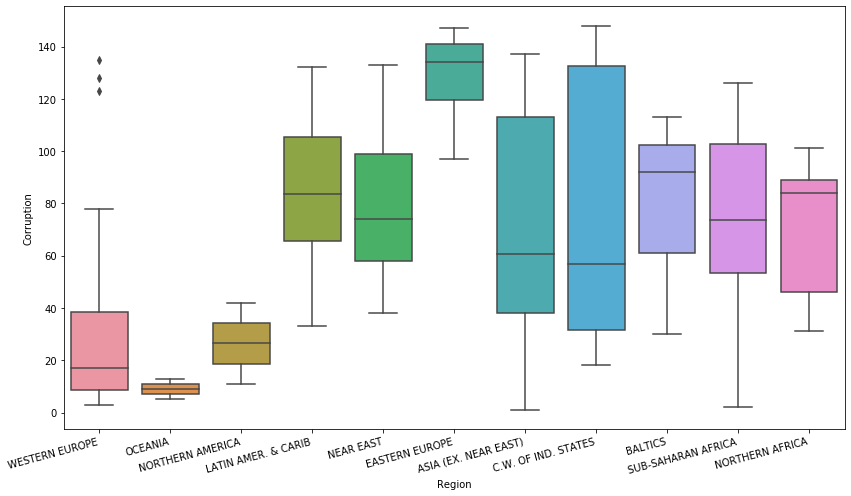

In [8]:
plt.figure(figsize = (12, 7))
ax = sns.boxplot(x="Region", y="Corruption", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()

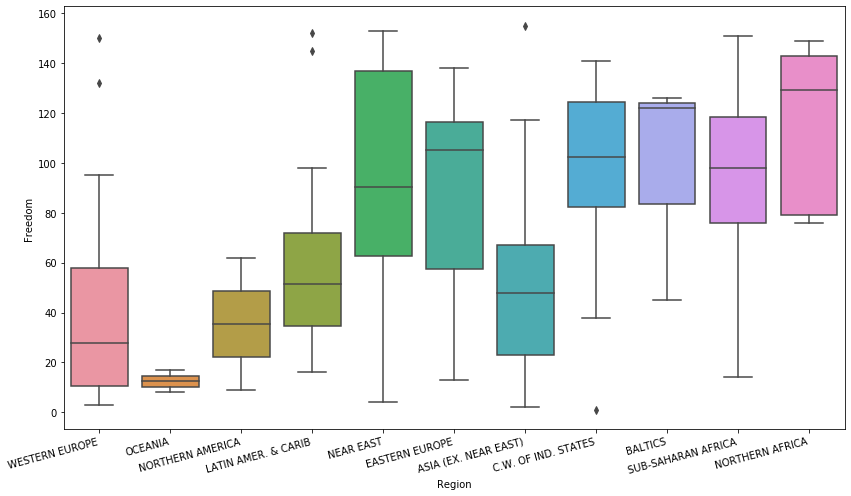

In [9]:
plt.figure(figsize = (12, 7))
ax = sns.boxplot(x="Region", y="Freedom", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()

# The effect of Birthrate and Deathrate on Happiness Ranking

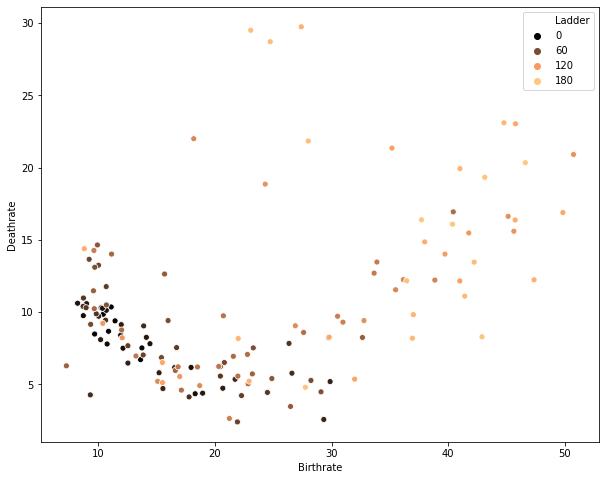

In [10]:
plt.figure(figsize = (10, 8))
with sns.color_palette("PuBuGn_d"):
    sns.scatterplot(data=df, x="Birthrate", y="Deathrate", hue='Ladder', palette='copper')